* **차원 축소**는 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류이다. 차원 축소는 저장 공간을 줄이고 시각화하기 쉽다. 또한 다른 알고리즘의 성능을 높일 수도 있다.
* **주성분 분석**은 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법이다. 이런 방향을 주성분이라고 한다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다. 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다.
* **설명된 분산**은 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것이다. 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.

# scikit-learn

* **PCA**는 주성분 분석을 수행하는 클래스이다.
  * n_components는 주성분의 개수를 지정한다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용한다.
  * random_state에는 넘파이 난수 시드 값을 지정할 수 있다.
  * components_ 속성에는 훈련 세트에서 찾은 주성분이 저장된다.
  * explained_variance_ 속성에는 설명된 분산이 저장되고, explained_variance_ratio_에는 설명된 분산의 비율이 저장된다.
  * inverse_transform() 메서드는 transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원한다.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2024-11-03 06:38:42--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-11-03 06:38:42--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-11-03 06:38:43--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


In [3]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # 샘플의 개수

  # 한 줄에 10개씩 이미지 그림. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')

  plt.show()

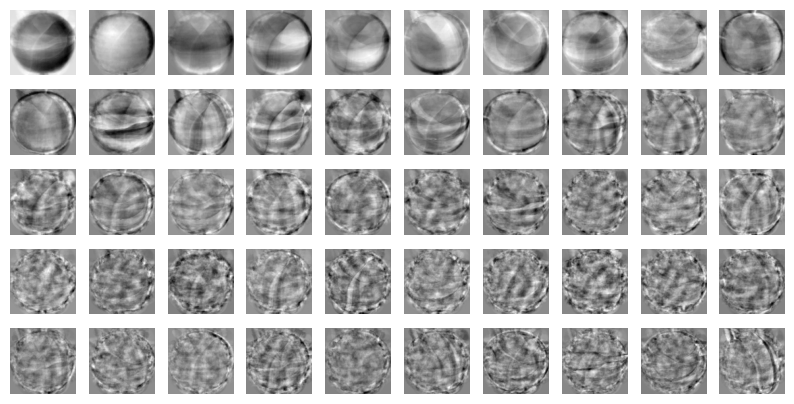

In [4]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [6]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [7]:
fruits_inverse = pca.inverse_transform(fruits_pca)

print(fruits_inverse.shape)

(300, 10000)


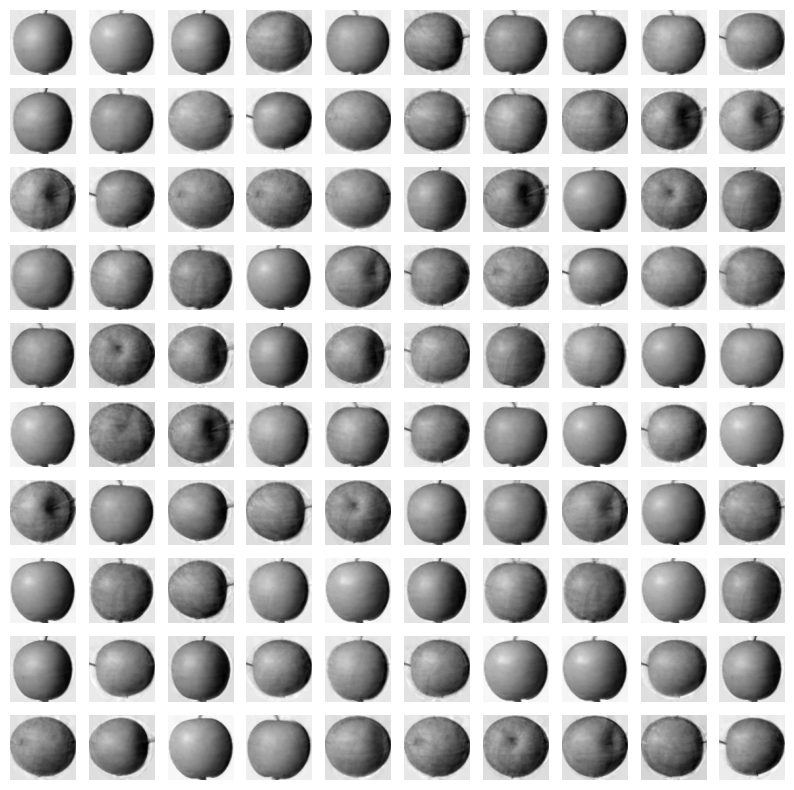

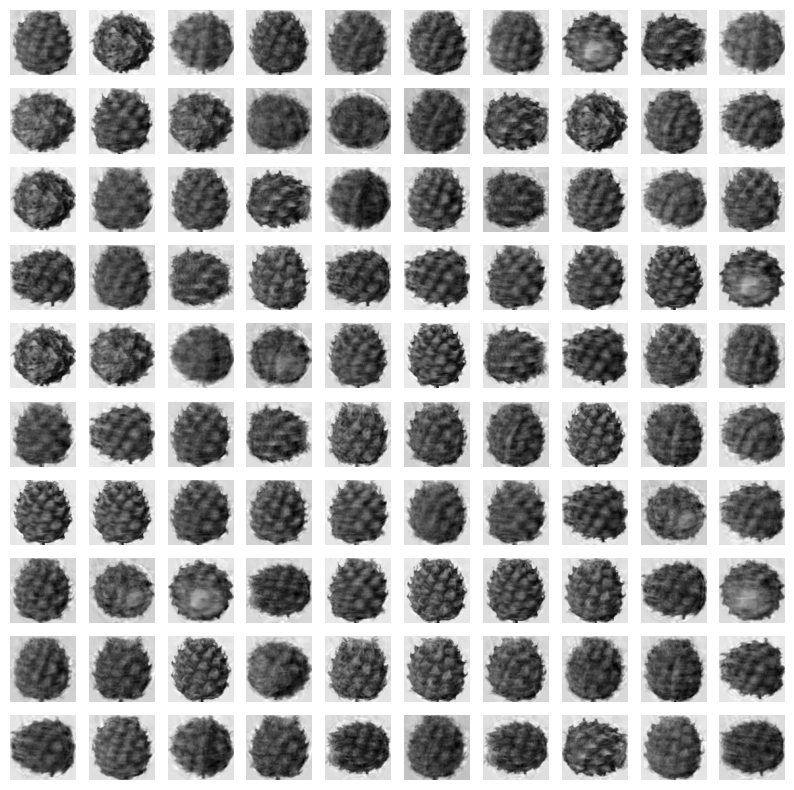

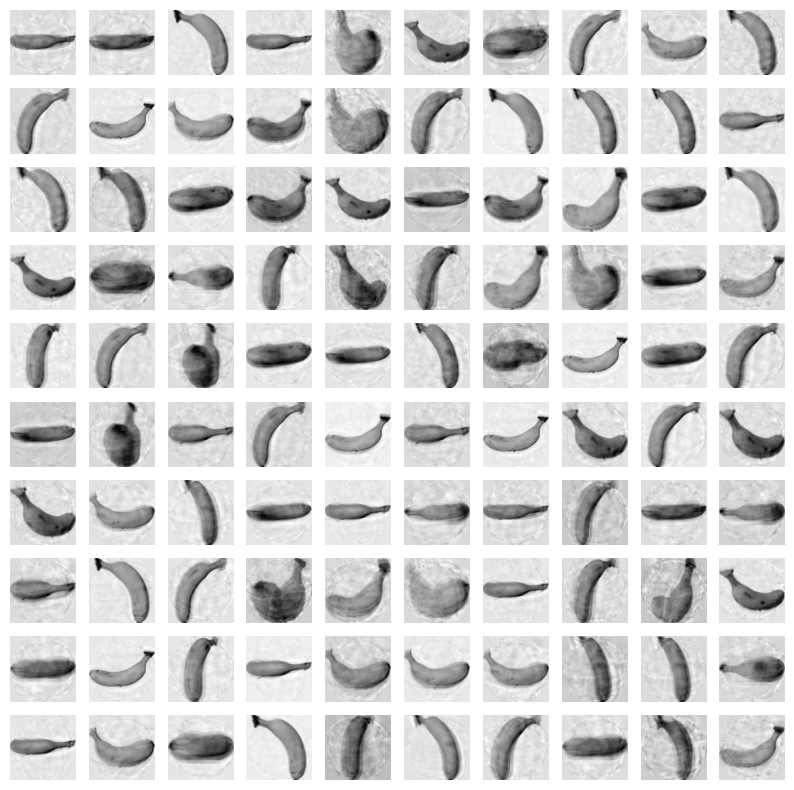

In [8]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

In [9]:
print(np.sum(pca.explained_variance_ratio_))

0.9214459333481562


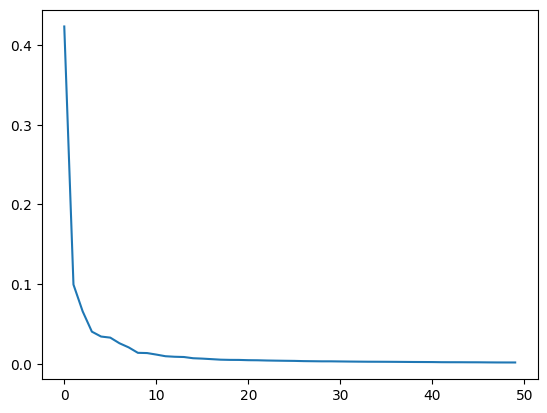

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [12]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.7690339088439941


In [16]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.009688425064086913


In [17]:
pca = PCA(n_components=0.5)

pca.fit(fruits_2d)

PCA(n_components=0.5)

In [18]:
print(pca.n_components_)

2


In [19]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.02334628105163574


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state = 42)

km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


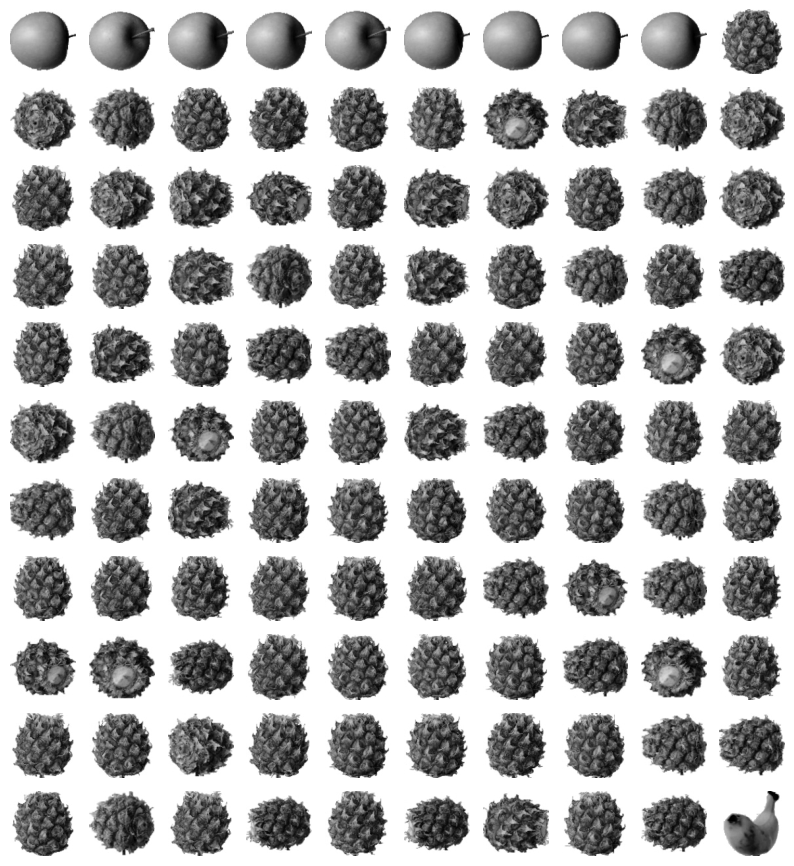

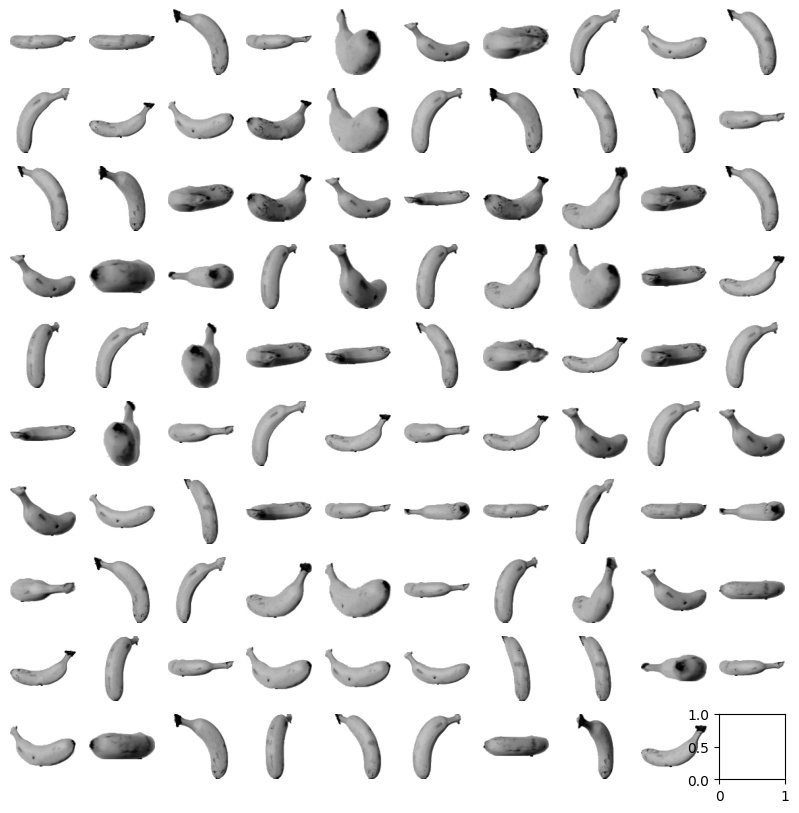

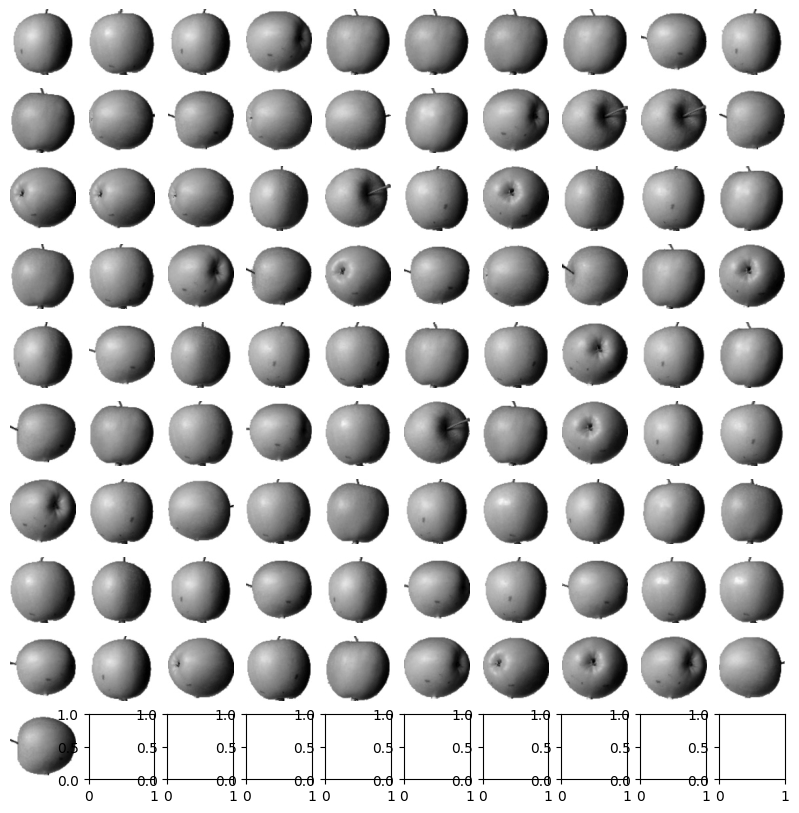

In [25]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])

  print("\n")

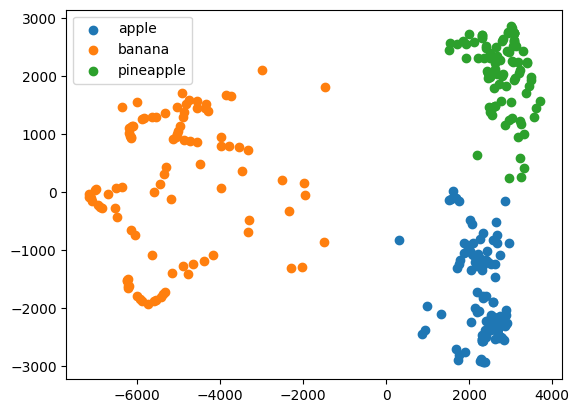

In [26]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'banana', 'pineapple'])

plt.show()